# Functions for variable FLCs

The functions in the usual benchmark suite are difficult to analyze in terms of FLCs because they differ too much. In this notebook, we will try to make functions that are tweakable in ways that will influence selected FLCs directly, while leaving others unaffected, as far as possible. These functions can then be used to explore the influence of individual FLCs on PSO behaviour.

# Neutrality

Let's start here, because it's easy to visualise.

We can use step, which has a lot of neutrality, and just increase the step size in order to increase the connectedness (LSN). In the process, the overall amount of neutrality will probably also increase. Let's see.

## Vanilla step

In [1]:
import numpy as np

def step(xs):
    """The vanilla Step functon.
    low = -20.
    high = 20.
    """
    return np.sum(np.square(np.floor(x + .5)) for x in xs)



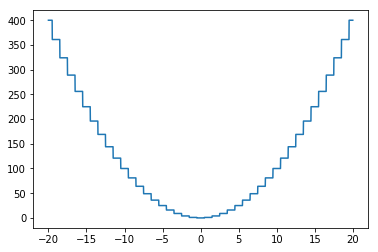

In [3]:
from matplotlib import pyplot as plt
import numpy as np

xss = np.arange(-20., 20., .01)
ys = [step([xs]) for xs in xss]
plt.plot(xss, ys)
plt.show()

## Tweakable step

With variable step size

In [2]:
import numpy as np

def step(xs, step_size):
    """Step function with variable step size.
    step_size defines the minimum distance to the next step.
    low = -20.
    high = 20.
    """
    return np.sum(np.square(np.floor(x/step_size + .5)*step_size) for x in xs)


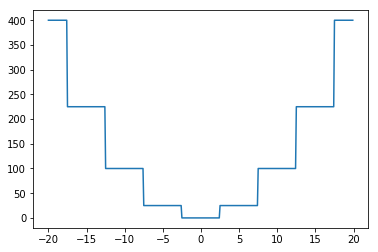

In [3]:
from matplotlib import pyplot as plt

# Tweak me!
step_size = 5.

xs = np.arange(-20., 20., 0.1)
ys = [step([x], step_size) for x in xs]
plt.plot(xs, ys)
plt.show()

Bingo! Now we can define various fixed-stepsize functions:

In [4]:
# With step sizes of 1 and larger:

def step_1(xs):
    return step(xs, 1.)

def step_2(xs):
    return step(xs, 2.)

def step_5(xs):
    return step(xs, 5.)

def step_10(xs):
    return step(xs, 10.)

# With step sizes of 1 and smaller:

def step_0_5(xs):
    return step(xs, .5)

def step_0_1(xs):
    return step(xs, .1)

def step_0_05(xs):
    return step(xs, .05)

def step_0_01(xs):
    return step(xs, 0.01)

Let's see what they look like, and also take some measurements on them.

<function step_0_05 at 0x1112c97d0>


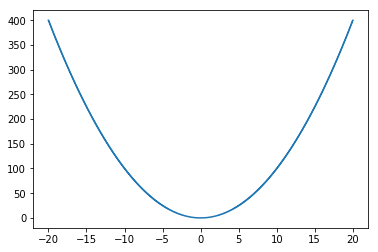

[neutrality] walk 0 / 1 : walking...
PN: 0.0 , LSN: 0.0
<function step_0_1 at 0x1112c9b18>


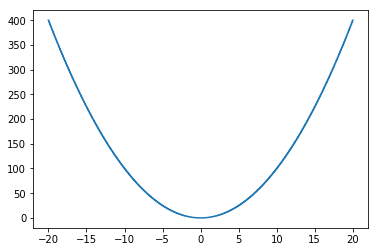

[neutrality] walk 0 / 1 : walking...
PN: 0.0 , LSN: 0.0
<function step_0_5 at 0x1112c9848>


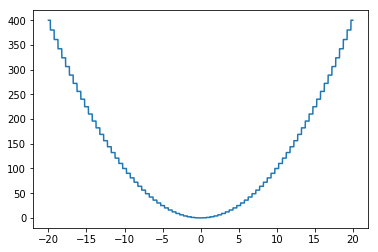

[neutrality] walk 0 / 1 : walking...
PN: 0.145833333333 , LSN: 0.0833333333333
<function step_1 at 0x1112c9a28>


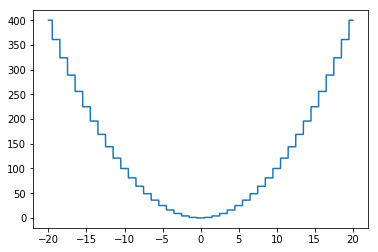

[neutrality] walk 0 / 1 : walking...
PN: 0.270833333333 , LSN: 0.0625
<function step_2 at 0x1112c9668>


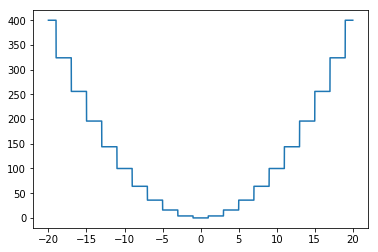

[neutrality] walk 0 / 1 : walking...
PN: 0.583333333333 , LSN: 0.166666666667
<function step_5 at 0x1112c98c0>


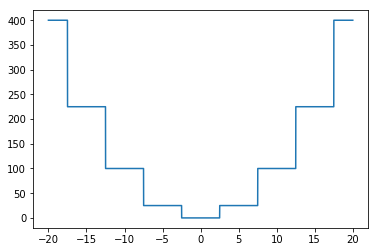

[neutrality] walk 0 / 1 : walking...
PN: 0.833333333333 , LSN: 0.229166666667
<function step_10 at 0x1112c99b0>


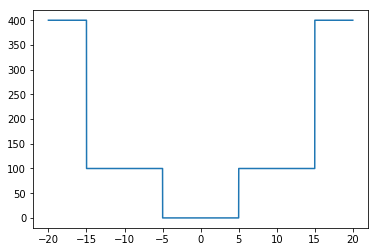

[neutrality] walk 0 / 1 : walking...
PN: 0.916666666667 , LSN: 0.5625


In [44]:
from matplotlib import pyplot as plt
import numpy as np

from psodroc.measures import neutrality

xss = np.arange(-20., 20., .0001)
fs = [
    step_0_05, step_0_1, step_0_5,
    step_1, step_2, step_5, step_10
]

for f in fs:
    print f

    # Plot the function in 1D.
    ys = [f([xs]) for xs in xss]
    plt.plot(xss, ys)
    plt.show()
    
    # Get neutrality measures in 1D.
    pn, lsn = neutrality.PN_LSN(f, -20., 20., 1)
    print 'PN:', pn, ', LSN:', lsn
    

Good! So the neutrality increases as step size increases. What about the other FLCs though? Can we keep them fairly constant?

In [46]:
import numpy as np

from psodroc.measures import deception, funnels, gradients, neutrality, ruggedness, searchability

fs = [
    step_0_05, step_0_1, step_0_5,
    step_1, step_2, step_5, step_10
]

for f in fs:
    print f
    
    fdc = deception.FDC(f, -20., 20., 1)
    print 'FDC:', fdc
    
    dm = funnels.DM(f, -20., 20., 1)
    print 'DM:', dm
    
    g_avg, g_dev = gradients.G_measures(f, -20., 20., 1)
    print 'G_avg:', g_avg, ', G_dev:', g_dev
    
    pn, lsn = neutrality.PN_LSN(f, -20., 20., 1)
    print 'PN:', pn, 'LSN:', lsn
    
    fem_1 = ruggedness.FEM_0_1(f, -20., 20., 1)
    fem_01 = ruggedness.FEM_0_01(f, -20., 20., 1)
    print 'FEM_0_1:', fem_1, ', FEM_0_01:', fem_01
    
    fci_soc = searchability.FCI_soc(f, -20., 20., 1)
    fci_cog = searchability.FCI_cog(f, -20., 20., 1)
    print 'FCI_soc:', fci_soc, ', FCI_cog:', fci_cog
    
    print '\n'
    

<function step_0_05 at 0x1112c97d0>
FDC: 0.9677143558
DM: -0.134865441826
G_avg: 1.99700325325 , G_dev: 1.63105643204
[neutrality] walk 0 / 1 : walking...
PN: 0.0 LSN: 0.0
FEM_0_1: 0.54219610535 , FEM_0_01: 0.469374259455
FCI_soc: 0.906 , FCI_cog: 0.832


<function step_0_1 at 0x1112c9b18>
FDC: 0.969229750151
DM: -0.136560890464
G_avg: 2.002002002 , G_dev: 3.05590977952
[neutrality] walk 0 / 1 : walking...
PN: 0.0 LSN: 0.0
FEM_0_1: 0.542164470767 , FEM_0_01: 0.472210415293
FCI_soc: 0.87 , FCI_cog: 0.828


<function step_0_5 at 0x1112c9848>
FDC: 0.968153015515
DM: -0.135708920099
G_avg: 2.002002002 , G_dev: 7.91927780526
[neutrality] walk 0 / 1 : walking...
PN: 0.104166666667 LSN: 0.0208333333333
FEM_0_1: 0.555180525047 , FEM_0_01: 0.682352735685
FCI_soc: 0.84 , FCI_cog: 0.748


<function step_1 at 0x1112c9a28>
FDC: 0.967259932782
DM: -0.132877407481
G_avg: 2.002002002 , G_dev: 11.3743294909
[neutrality] walk 0 / 1 : walking...
PN: 0.229166666667 LSN: 0.0416666666667
FEM_0_1: 0.54596006

Ok, let's make that digestible -- plot it!

Maybe just an xy plot for each FLC?

In [5]:
# Data calculation:

from matplotlib import pyplot as plt
import numpy as np

from psodroc.measures import deception, funnels, gradients, neutrality, ruggedness, searchability

step_sizes = [.05, .1, .5, 1., 2., 5., 10.]
fs = [
    step_0_05, step_0_1, step_0_5,
    step_1, step_2, step_5, step_10
]


fdcss = []
dmss = []
g_avgss = []
g_devss = []
pnss = []
lsnss = []
fem1ss = []
fem01ss = []
fci_socss = []
fci_cogss = []

for f in fs:
    print 'calculating', f,
    fdcs = []
    dms = []
    g_avgs = []
    g_devs = []
    pns = []
    lsns = []
    fem1s = []
    fem01s = []
    fci_socs = []
    fci_cogs = []
    
    for i in range(30):
        print '.',
        fdc = deception.FDC(f, -20., 20., 1)
        fdcs.append(fdc)
        
        dm = funnels.DM(f, -20., 20., 1)
        dms.append(dm)
        
        g_avg, g_dev = gradients.G_measures(f, -20., 20., 1)
        g_avgs.append(g_avg)
        g_devs.append(g_dev)
        
        pn, lsn = neutrality.PN_LSN(f, -20., 20., 1)
        pns.append(pn)
        lsns.append(lsn)
        
        fem1 = ruggedness.FEM_0_1(f, -20., 20., 1)
        fem01 = ruggedness.FEM_0_01(f, -20., 20., 1)
        fem1s.append(fem1)
        fem01s.append(fem01)
        
        fci_soc = searchability.FCI_soc(f, -20., 20., 1)
        fci_cog = searchability.FCI_cog(f, -20., 20., 1)
        fci_socs.append(fci_soc)
        fci_cogs.append(fci_cog)

    print ''
    fdcss.append(np.average(fdcs))
    dmss.append(np.average(dms))
    g_avgss.append(np.average(g_avgs))
    g_devss.append(np.average(g_devs))
    pnss.append(np.average(pns))
    lsnss.append(np.average(lsns))
    fem1ss.append(np.average(fem1s))
    fem01ss.append(np.average(fem01s))
    fci_socss.append(np.average(fci_socs))
    fci_cogss.append(np.average(fci_cogs))



calculating <function step_0_05 at 0x10d90c578> . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
calculating <function step_0_1 at 0x10d90c500> . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
calculating <function step_0_5 at 0x10d90c410> . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
calculating <function step_1 at 0x10d90c398> . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
calculating <function step_2 at 0x10d90c140> . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
calculating <function step_5 at 0x10d90c488> . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
calculating <function step_10 at 0x10d90c230> . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 



FDC


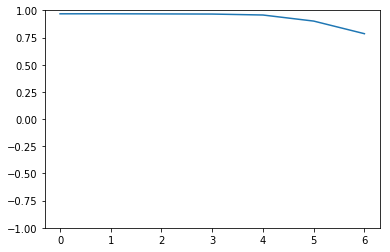


DM


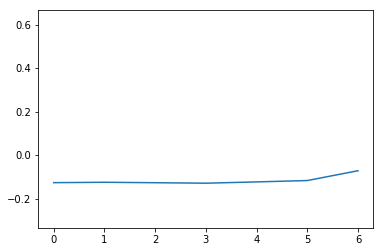


G_avg


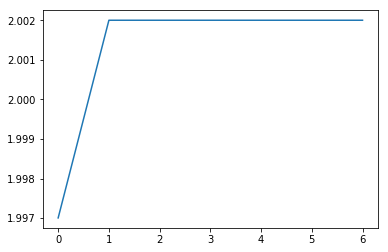


G_dev


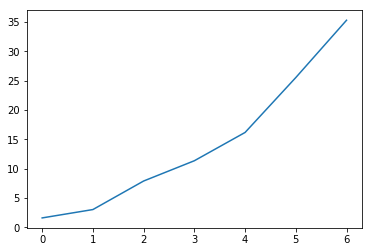


PN


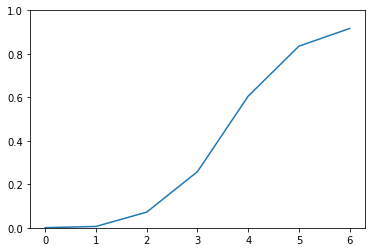


LSN


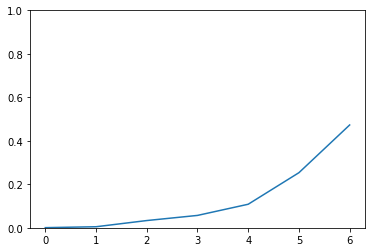


FEM_0_1


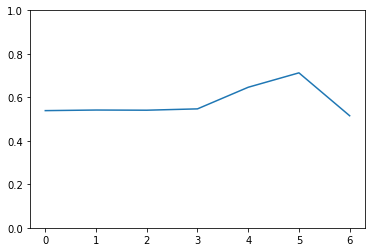


FEM_0_01


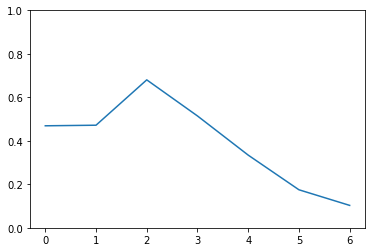


FCI_socs


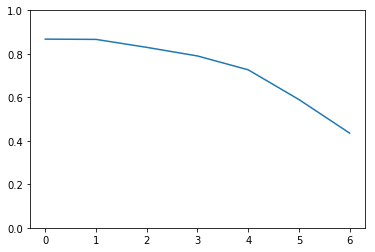


FCI_cogss


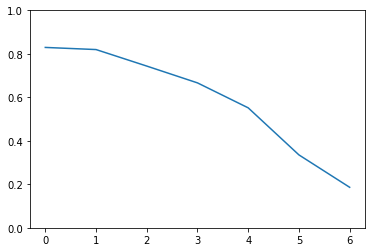

In [18]:
# Data representation:

from matplotlib import pyplot as plt

from psodroc.measures import funnels

print '\nFDC'
ymin = -1.
ymax = 1.
axes = plt.gca()
axes.set_ylim([ymin, ymax])
plt.plot(fdcss)
plt.show()

print '\nDM'
ymin = -funnels._dispersion_const(1)
ymax = 1 - funnels._dispersion_const(1)
axes = plt.gca()
axes.set_ylim([ymin, ymax])
plt.plot(dmss)
plt.show()

print '\nG_avg'
# TODO: this is supposed to be in [0, 1], but isn't!
# ymin = 0
# ymax = 1
# axes = plt.gca()
# axes.set_ylim([ymin, ymax])
plt.plot(g_avgss)
plt.show()

print '\nG_dev'
# TODO: this is supposed to be in [0, 1], but isn't!
# ymin = 0
# ymax = 1
# axes = plt.gca()
# axes.set_ylim([ymin, ymax])
plt.plot(g_devss)
plt.show()

print '\nPN'
ymin = 0.
ymax = 1.
axes = plt.gca()
axes.set_ylim([ymin, ymax])
plt.plot(pnss)
plt.show()

print '\nLSN'
ymin = 0.
ymax = 1.
axes = plt.gca()
axes.set_ylim([ymin, ymax])
plt.plot(lsnss)
plt.show()

print '\nFEM_0_1'
ymin = 0.
ymax = 1.
axes = plt.gca()
axes.set_ylim([ymin, ymax])
plt.plot(fem1ss)
plt.show()

print '\nFEM_0_01'
ymin = 0.
ymax = 1.
axes = plt.gca()
axes.set_ylim([ymin, ymax])
plt.plot(fem01ss)
plt.show()

print '\nFCI_socs'
ymin = 0.
ymax = 1.
axes = plt.gca()
axes.set_ylim([ymin, ymax])
plt.plot(fci_socss)
plt.show()

print '\nFCI_cogss'
ymin = 0.
ymax = 1.
axes = plt.gca()
axes.set_ylim([ymin, ymax])
plt.plot(fci_cogss)
plt.show()